In [5]:
import praw

reddit = praw.Reddit(client_id='Pj5o8QpNXXJY9A',
                    client_secret='pQKMRBmhp0In48NoNvvktfRo2eA',
                    pasword = 'prawisgreat',
                    user_agent='Reddit Unlocked CS196 Project @ UIUC',
                    username='RedditUnlocked196')
news = reddit.subreddit('news')
for submission in news.top('year'):
    print(submission.url)

Version 5.1.0 of praw is outdated. Version 5.2.0 was released Tuesday October 24, 2017.
https://www.nytimes.com/2017/11/21/technology/fcc-net-neutrality.html
http://www.independent.co.uk/news/world/asia/japanese-firm-piala-inc-tokyo-non-smokers-extra-six-days-holiday-cigarette-break-a8028541.html
http://wtkr.com/2017/07/20/tmz-report-chester-bennington-of-linkin-park-commits-suicide/
http://www.reuters.com/article/us-usa-trump-immigration-idUSKBN15E1DE
https://arstechnica.com/tech-policy/2017/11/comcast-quietly-drops-promise-not-to-charge-tolls-for-internet-fast-lanes/
http://abcn.ws/2qPcnnU
http://www.prnewswire.com/news-releases/american-icon-and-playboy-founder-hugh-m-hefner-has-died-300527267.html
https://lbpost.com/life/pets/2000011459-pet-store-bill-passes-california-senate-38-to-0
http://money.cnn.com/2017/02/24/media/cnn-blocked-white-house-gaggle/index.html
https://www.independent.co.uk/news/uk/home-news/billy-caldwell-cannabis-oil-boy-seizures-stopped-cured-prescription-medic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly
plotly.tools.set_credentials_file(username='reddit_unlocked', api_key='gfnXKc7JvUKST4HRJyFX')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

In [18]:
top10news_df = pd.DataFrame({
    'title': (),
    'url' : (),
    'upvote_percentage': (),
    'year_posted': (),
    'month_posted': (),
    'day_posted': (),
    'is_self': (),
    'is_video': (),
    'media': (),
    'domain': (),
    'upvotes': (),
    'downvotes': (),
    'score': (),
    'views': ()
})
for submission in news.top('year', limit = 50):
    s = pd.Series([submission.title, submission.url, submission.upvote_ratio * 100,
                   datetime.utcfromtimestamp(submission.created_utc).year,
                  datetime.utcfromtimestamp(submission.created_utc).month,
                  datetime.utcfromtimestamp(submission.created_utc).day,
                  submission.is_self, submission.is_video, submission.media, submission.domain,
                   submission.score, submission.view_count,
                   int((submission.score * submission.upvote_ratio)/(2 * submission.upvote_ratio - 1))],
                  index=['title','url','upvote_percentage', 'year_posted', 'month_posted',
                         'day_posted', 'is_self', 'is_video', 'media', 'domain', 'score','views', 'upvotes'])
    top10news_df = top10news_df.append(s, ignore_index=True)
top10news_df['downvotes'] = top10news_df['upvotes'] - top10news_df['score']
top10news_df

KeyboardInterrupt: 

#For me to know the fields available
top10news_df = pd.DataFrame({
    'title': (),
    'url' : (),
    'upvote_percentage': (),
    'year_posted': (),
    'month_posted': (),
    'day_posted': (),
    'is_self': (),
    'is_video': (),
    'media': (),
    'domain': (),
    'upvotes': (),
    'downvotes': (),
    'score': (),
    'views': ()
})

In [3]:
from textblob import TextBlob, Word, Blobber
import newspaper
from newspaper import Article
import operator
import rake as rake
from datetime import datetime
rake_object = rake.Rake("SmartStoplist.txt", 1, 2, 1)

[('compatibility', 1.0), ('of', 1.0), ('systems', 1.0), ('linear', 1.0), ('constraints', 1.0), ('over', 1.0), ('the', 1.0), ('set', 1.0), ('natural', 1.0), ('numbers', 1.0), ('criteria', 1.0), ('system', 1.0), ('diophantine', 1.0), ('equations', 1.0)]
[('minimal generating sets', 8.666666666666666), ('linear diophantine equations', 8.5), ('minimal supporting set', 7.666666666666666), ('minimal set', 4.666666666666666), ('linear constraints', 4.5), ('natural numbers', 4.0), ('strict inequations', 4.0), ('nonstrict inequations', 4.0), ('upper bounds', 4.0), ('mixed types', 3.666666666666667), ('considered types', 3.166666666666667), ('set', 2.0), ('types', 1.6666666666666667), ('considered', 1.5), ('compatibility', 1.0), ('systems', 1.0), ('criteria', 1.0), ('system', 1.0), ('components', 1.0), ('solutions', 1.0), ('algorithms', 1.0), ('construction', 1.0), ('constructing', 1.0), ('solving', 1.0)]


In [20]:
# This is the function in run_praw.py, so I'm using it as a reference for all my algs
def display_praw(name):
    reddit = praw.Reddit(client_id='Pj5o8QpNXXJY9A',
                         client_secret='pQKMRBmhp0In48NoNvvktfRo2eA',
                         password='prawisgreat',
                         user_agent='Reddit Unlocked CS196 Project @ UIUC',
                         username='RedditUnlocked196')

    subreddit = reddit.subreddit(name)

    threads_df = pd.DataFrame({
        'Title': (),
        'URL': (),
        'Upvote Ratio (%)': (),
        'Net Score': (),
        '# of Upvotes': (),
        '# of Downvotes': (),
        'Post Date': (),
        'Self Post?': (),
        'Video Post?': (),
        'Domain': ()
    })

    threads_df = threads_df[['Title', 'URL', 'Upvote Ratio (%)', 'Net Score', '# of Upvotes', '# of Downvotes',
                             'Post Date', 'Self Post?', 'Video Post?', 'Domain']]

    for thread in subreddit.top('year', limit=50): # TODO: change limit number when actually deploying program. 15 is the testing number.
        actualUps = int((thread.upvote_ratio * thread.score) / (thread.upvote_ratio * 2 - 1))
        actualDowns = actualUps - thread.score
        gather = pd.Series([thread.title, thread.url, thread.upvote_ratio * 100, thread.score,
                            actualUps, actualDowns, thread.created_utc,
                            thread.is_self, thread.is_video, thread.domain],
                           index=['Title', 'URL', 'Upvote Ratio (%)', 'Net Score', '# of Upvotes', '# of Downvotes',
                                  'Post Date', 'Self Post?', 'Video Post?', 'Domain'])
        threads_df = threads_df.append(gather, ignore_index=True)

    threads_dict = threads_df.to_dict(orient='records')

    for entry in threads_dict:
        if isinstance(str(entry['Post Date']), str):
            time = datetime.fromtimestamp(entry['Post Date'])
            formatTime = time.strftime('%b %d, %Y')
        else:
            formatTime = None

        entry['Post Date'] = formatTime

    return threads_dict


def get_keyword_dict(name):
    # Transforms dict returned by display_praw into DataFrame for working with
    start = datetime.now()
    print("Start drawing from Reddit!")
    top10news_df = pd.DataFrame.from_dict(display_praw(name))
    reddit_time = datetime.now() - start
    print("Time taken to gather 50 posts from reddit: %s" % reddit_time)
    words = {}

    ## NEWSPAPER STUFF HERE ##

    # Get keywords out of all articles
    for i in range(len(top10news_df)):
        #top10news_df.iloc[i]['url']
        myArticle = Article(top10news_df.iloc[i]['URL'])
        
        # If a link fails we except it and move on
        try:
            myArticle.download()
            myArticle.parse()
        except:
            print("Bad link!")
            continue
        
        print(myArticle.url)
        
        myArticle.nlp()


        # Run sentiment analysis on each article, fetch subjectivity and polarity
        text = myArticle.text
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity

        # Get associated Reddit post info for each keyword, store in dictionary
        for keyword in myArticle.keywords:

            # Don't waste time with numeric keywords, skip them if they contain numbers
            if any(char.isdigit() for char in keyword):
                continue        

            if keyword not in words:
                words[keyword] = [keyword, 1, 
                                  top10news_df.iloc[i]['# of Upvotes'],
                                  top10news_df.iloc[i]["# of Downvotes"], 
                                  top10news_df.iloc[i]["Net Score"],
                                  subjectivity, polarity, 
                                  {(top10news_df.iloc[i]["Domain"]):1}]
            else:
                words[keyword][1] += 1
                words[keyword][2] += top10news_df.iloc[i]['# of Upvotes']
                words[keyword][3] += int(top10news_df.iloc[i]['# of Downvotes'])
                words[keyword][4] += int(top10news_df.iloc[i]['Net Score'])
                words[keyword][5] = np.mean([subjectivity, words[keyword][5]])
                words[keyword][6] = np.mean([polarity, words[keyword][6]])
                if top10news_df.iloc[i]["Domain"] in words[keyword][7]:
                    words[keyword][7][(top10news_df.iloc[i]["Domain"])] += 1
                else:
                    words[keyword][7][top10news_df.iloc[i]["Domain"]] = 1

        ## RAKE STUFF HERE ##

        # Pull keywords from title strings
        for wordPair in rake_object.run(top10news_df.iloc[i]['Title']):
            currentWord = wordPair[0]

            # Don't waste time with numeric keywords, skip them if they contain numbers
            if any(char.isdigit() for char in currentWord):
                continue

            # Grab associated Reddit post data for each keyword, store in dictionary
            if currentWord not in words:
                words[currentWord] = [currentWord, 1, 
                                  top10news_df.iloc[i]['# of Upvotes'],
                                  top10news_df.iloc[i]["# of Downvotes"], 
                                  top10news_df.iloc[i]["Net Score"],
                                  subjectivity, polarity, 
                                  {(top10news_df.iloc[i]["Domain"]):1}]
            else:
                words[currentWord][1] += 1
                words[currentWord][2] += int(top10news_df.iloc[i]['# of Upvotes'])
                words[currentWord][3] += int(top10news_df.iloc[i]['# of Downvotes'])
                words[currentWord][4] += int(top10news_df.iloc[i]['Net Score'])
                if top10news_df.iloc[i]["Domain"] in words[currentWord][7]:
                    words[currentWord][7][(top10news_df.iloc[i]["Domain"])] += 1
                else:
                    words[currentWord][7][top10news_df.iloc[i]["Domain"]] = 1


    ### FOR GARY'S USE ###
    # Output dictionary is named 'words' #
    # Format is as such: #
    # key = keyword #
    # value = [Occurences, Upvotes, Downvotes, Score, Subjectivity, Polarity, Domain Dictionary] #
    
    return words
    
    

# For runtime comparison
start_time = datetime.now()

keywords_df = pd.DataFrame(get_keyword_dict(), index=['Keyword',
                                                      'Occurences',
                                                      'Upvotes', 
                                                      'Downvotes', 
                                                      "Score", 
                                                      "Subjectivity", 
                                                      "Polarity", 
                                                      "Domain"])

keywords_df = keywords_df.transpose().set_index('Keyword').sort_values('Occurences', ascending=False)
time = str(datetime.now() - start_time)
print("Total time: %s" % time)
keywords_df

Start drawing from Reddit!
Time taken to gather 50 posts from reddit: 0:00:54.469467
https://i.redd.it/sbm22jdaoy001.jpg
https://www.youtube.com/watch?v=_ZjDVQLQRT8&feature=youtu.be
https://i.redd.it/tx2weff8yb101.jpg
https://i.redd.it/lk9v8mhbl8qz.jpg
https://www.justice.gov/usao-cdil/pr/champaign-man-arrested-charged-kidnapping-visiting-scholar
https://i.redd.it/w8i1p780odzz.jpg
https://www.reddit.com/r/UIUC/comments/6rwogb/college_kids_dont_get_fucking_pets_if_youre_not/
https://www.reddit.com/r/UIUC/comments/67i2bk/to_the_two_girls_who_talked_me_down_from_the_top/
https://www.reddit.com/r/UIUC/comments/6ku3wo/possibly_unpopular_opinion_doing_armchair/
https://www.reddit.com/r/UIUC/comments/5w33r8/motherfucking_wind/
https://i.redd.it/biztlbxqsj101.png
https://i.redd.it/8m3ykh6wphqz.jpg
Article `download()` failed with 403 Client Error: Forbidden for url: https://scontent.xx.fbcdn.net/v/t1.0-9/15337499_10154000032936231_2852122272616179892_n.jpg?oh=09a6f6870b7762a49f3f3e5c84d1248b&o

,Occurences,Upvotes,Downvotes,Score,Subjectivity,Polarity,Domain
Keyword,,,,,,,
uiuc,21,6556,545,6011,0.395207,0.098934,"{'self.UIUC': 19, 'waf.cs.illinois.edu': 2}"
think,5,1864,265,1599,0.493829,-0.000525468,{'self.UIUC': 5}
youre,5,1536,81,1455,0.479566,0.149032,"{'self.UIUC': 4, 'imgur.com': 1}"
dont,5,1806,125,1681,0.592446,0.0890548,{'self.UIUC': 5}
illini,4,1043,29,1014,0.579779,0.219649,"{'self.UIUC': 3, 'twitter.com': 1}"
fucking,4,1396,66,1330,0.27181,-0.0405864,"{'self.UIUC': 3, 'imgur.com': 1}"
work,4,1286,147,1139,0.490759,0.147298,"{'self.UIUC': 3, 'imgur.com': 1}"
ms,3,1288,68,1220,0.326987,-0.0103732,"{'justice.gov': 1, 'police.illinois.edu': 2}"
illinois,3,1690,155,1535,0.256736,0.016089,"{'i.redd.it': 1, 'justice.gov': 1, 'police.ill..."


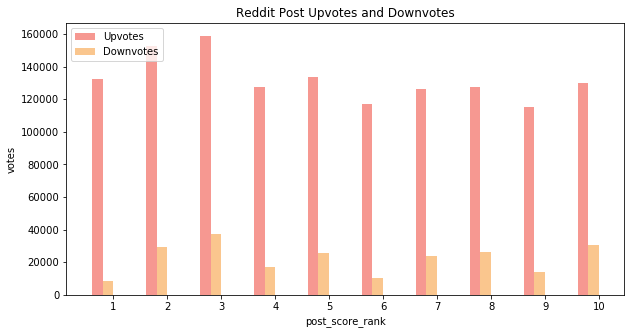

/Users/AlexBraznichenko/miniconda3/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [4]:
#code reference from https://chrisalbon.com/python/matplotlib_grouped_bar_plot.html
pos = list(range(len(top10news_df['title'])))
width = .2

fig, ax = plt.subplots(figsize = (10,5))
plt.bar(pos, 
        #using df['upvotes'] data,
        top10news_df['upvotes'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in title
        label=top10news_df['title'][0]) 
plt.bar([p + width for p in pos],
       top10news_df['downvotes'],
        width,
        alpha = .5,
        color='#F78F1E',
        label=top10news_df['title'][1]
       )
ax.set_ylabel('votes')
ax.set_xlabel('post_score_rank')
ax.set_title('Reddit Post Upvotes and Downvotes')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(range(1,11))
plt.legend(['Upvotes', 'Downvotes'], loc='upper left')
plt.show()
py.iplot_mpl(fig)

In [12]:
#plotly interactive barchart testing
#code reference from https://plot.ly/python/ipython-notebook-tutorial/#plotting-interactive-maps
trace_upvotes = Bar(x=top10news_df.title,
                   y=top10news_df.upvotes,
                   name='Upvotes',
                   text = top10news_df.title,
                   textposition = 'auto',
                   marker=dict(color='#FFCDD2'))

trace_downvotes = Bar(x=top10news_df.title,
                     y=top10news_df.downvotes,
                     name='Downvotes',
                     marker=dict(color='#A2D5F2'))
data = [trace_upvotes, trace_downvotes]
layout = Layout(title="Reddit Post Upvotes and Downvotes",
               xaxis=dict(title='title'))
fig=Figure(data=data, layout=layout)
url = py.plot(fig, filename = 'barchart')
print(url)
#write function that takes in data frame and returns String of the url
#for the plotly interactive graph

https://plot.ly/~reddit_unlocked/108


In [19]:
trace1 = go.Scatter(
    x = top10news_df.month_posted,
    y = top10news_df.score,
    mode = 'markers+text',
    marker = dict(
        size = (top10news_df.upvotes + top10news_df.downvotes) / 200000 * 40,
        color = top10news_df.upvote_percentage,
        colorscale = 'Portland',
        showscale = True
    ),
    text = top10news_df.domain,
    textposition = 'bottom',
    textfont=dict(
        family='sans serif',
        size=18,
        color='#ff7f0e')
)
layout = go.Layout(
    title = 'Stats of top reddit/r/news posts',
    xaxis = dict(
        title = 'month_posted',
        ticks = 12,
    ),
    yaxis = dict(
        title = 'score',
        ticklen = 5,
    )
)
data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'reddit plot')

In [9]:
#Keyword incorporation
import newspaper
from newspaper import Article
import operator
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/AlexBraznichenko/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
from textblob import TextBlob

In [12]:
######################
#                    #
#   keyword search   #
#                    #
######################

import newspaper
from newspaper import Article
import operator
import rake as rake
rake_object = rake.Rake("SmartStoplist.txt", 1, 2, 1)

[('compatibility', 1.0), ('of', 1.0), ('systems', 1.0), ('linear', 1.0), ('constraints', 1.0), ('over', 1.0), ('the', 1.0), ('set', 1.0), ('natural', 1.0), ('numbers', 1.0), ('criteria', 1.0), ('system', 1.0), ('diophantine', 1.0), ('equations', 1.0)]
[('minimal generating sets', 8.666666666666666), ('linear diophantine equations', 8.5), ('minimal supporting set', 7.666666666666666), ('minimal set', 4.666666666666666), ('linear constraints', 4.5), ('natural numbers', 4.0), ('strict inequations', 4.0), ('nonstrict inequations', 4.0), ('upper bounds', 4.0), ('mixed types', 3.666666666666667), ('considered types', 3.166666666666667), ('set', 2.0), ('types', 1.6666666666666667), ('considered', 1.5), ('compatibility', 1.0), ('systems', 1.0), ('criteria', 1.0), ('system', 1.0), ('components', 1.0), ('solutions', 1.0), ('algorithms', 1.0), ('construction', 1.0), ('constructing', 1.0), ('solving', 1.0)]


In [16]:
words = {}

for i in range(len(top10news_df)):
    #top10news_df.iloc[i]['url']
    myArticle = Article(top10news_df.iloc[i]['url'])
    myArticle.download()
    myArticle.parse()
    myArticle.nlp()
    for keyword in myArticle.keywords:
        if keyword not in words:
            words[keyword] = [keyword, 1, top10news_df.iloc[i]['upvotes']]
        else:
            words[keyword][1] += 1
            words[keyword][2] += top10news_df.iloc[i]['upvotes']
    #RAKE STUFF HERE
    for wordPair in rake_object.run(top10news_df.iloc[i]['title']):
        currentWord = wordPair[0]
        #print(currentWord)
        if currentWord not in words:
            words[currentWord] = [currentWord, 1, top10news_df.iloc[i]['upvotes']]
        else:
            words[currentWord][1] += 1
            words[currentWord][2] += top10news_df.iloc[i]['upvotes']
keywords_df = pd.DataFrame(words, index=['Keyword','Occurences','Upvotes'])
keywords_df = keywords_df.transpose().set_index('Keyword')
keywords_df

,Occurences,Upvotes
Keyword,,
100,1,127476
100 seizures,1,127476
2017,1,132688
300,1,127476
300 days,1,127476
38,1,117061
41,1,152688
485,1,117061
60,1,129692


In [18]:
words = []
for i in range(0, len(top10news_df['title'])):
    if (top10news_df['is_self'][i] == 0.0):
        a = Article(top10news_df['url'][i], language = 'en')
        a.download()
        a.parse()
        a.text
        a.nlp()
        for word in a.text:
            words.append(TextBlob(word))
print(words)
proper_df
for post in words:
    for word in post.tags:
        if word[1] == 'NNP':
            if keywords_df.contains(word[0]) and keywords_df['Occurences'][word[0]] > 1:
                proper_df.append(word[0])
proper_nouns

['firm', 'nonsmokers', 'national', 'world', 'cigarette', 'days', 'holiday', 'compensate', 'security', 'extra', 'breaks', 'near', 'opposition', 'election', 'kenya', 'military', 'gives', 'japanese', '2017', 'woman']
['41', 'true', 'park', 'dead', 'bennington', 'soon', 'success', 'linkin', 'suicide', 'band', 'shinoda', 'singer', 'remember', 'chester', 'wonder', 'statement', 'album']
['state', 'lawyer', 'immigration', 'department', 'states', 'justice', 'defied', 'order', 'house', 'yates', 'trumps', 'united', 'white', 'dumps', 'trump', 'fired']
['confidence', 'general', 'white', 'director', 'comey', 'amid', 'fbi', 'spicer', 'president', 'russia', 'probe', 'trump', 'fired', 'attorney']
['icon', 'hefner', 'magazine', 'playboy', 'inducted', 'world', 'hugh', 'died', 'm', 'enterprises', 'award', 'american', 'mr', 'honored', 'founder']
['vote', '38', 'bill', 'california', 'senate', 'animals', 'dogs', 'passed', 'shelters', 'pet', 'store', 'pets', '485', 'passes']
['media', 'organizations', 'office

[]